In [1]:
from tensorflow.keras.datasets import reuters

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()

In [7]:
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

In [8]:
decoded_newswire = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [9]:
train_labels[10]

3

In [10]:
import numpy as np

In [11]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [12]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [16]:
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [13]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

In [15]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partical_y_train = y_train[1000:]

In [17]:
history = model.fit(partial_x_train,
                    partical_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 35ms/step - loss: 2.6533 - accuracy: 0.5215 - val_loss: 1.7338 - val_accuracy: 0.6610
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.4179 - accuracy: 0.7091 - val_loss: 1.3003 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0563 - accuracy: 0.7765 - val_loss: 1.1304 - val_accuracy: 0.7560
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8327 - accuracy: 0.8240 - val_loss: 1.0417 - val_accuracy: 0.7830
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6738 - accuracy: 0.8555 - val_loss: 0.9910 - val_accuracy: 0.7870
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5430 - accuracy: 0.8830 - val_loss: 0.9384 - val_accuracy: 0.7960
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 0.4405 - accuracy: 0.9073 - val_loss: 0.9974 - val_accuracy: 0.7770
Epoch 8/20
16

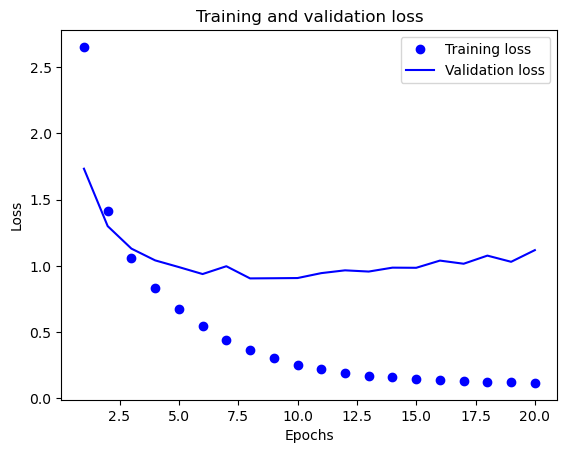

In [18]:
import  matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

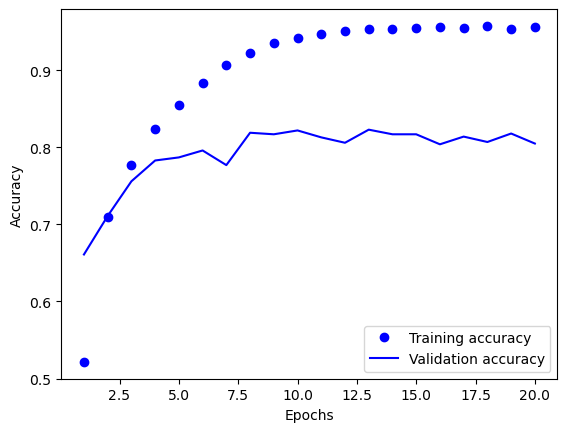

In [19]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

In [21]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
model.fit(x_train, y_train, epochs=13, batch_size=512)

Epoch 1/13
18/18 [==============================] - 0s 8ms/step - loss: 2.5810 - accuracy: 0.5243
Epoch 2/13
18/18 [==============================] - 0s 8ms/step - loss: 1.3648 - accuracy: 0.7175
Epoch 3/13
18/18 [==============================] - 0s 8ms/step - loss: 1.0028 - accuracy: 0.7855
Epoch 4/13
18/18 [==============================] - 0s 9ms/step - loss: 0.7757 - accuracy: 0.8331
Epoch 5/13
18/18 [==============================] - 0s 9ms/step - loss: 0.6110 - accuracy: 0.8701
Epoch 6/13
18/18 [==============================] - 0s 9ms/step - loss: 0.4845 - accuracy: 0.8992
Epoch 7/13
18/18 [==============================] - 0s 9ms/step - loss: 0.3910 - accuracy: 0.9154
Epoch 8/13
18/18 [==============================] - 0s 9ms/step - loss: 0.3203 - accuracy: 0.9315
Epoch 9/13
18/18 [==============================] - 0s 9ms/step - loss: 0.2653 - accuracy: 0.9417
Epoch 10/13
18/18 [==============================] - 0s 9ms/step - loss: 0.2287 - accuracy: 0.9462
Epoch 11/13
18/18 [

In [23]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 4ms/step - loss: 1.1159 - accuracy: 0.7814


In [24]:
results

[1.1158591508865356, 0.7813891172409058]

In [25]:
import copy

In [26]:
test_labels_copy = copy.copy(test_labels)

In [27]:
np.random.shuffle(test_labels_copy)

In [28]:
hits_array = np.array(test_labels) == np.array(test_labels_copy)

In [29]:
hits_array.mean()

0.18521816562778273

In [30]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [31]:
predictions[0].shape

(46,)

In [32]:
np.sum(predictions[0])

0.9999999

In [33]:
np.argmax(predictions[0])

3

In [34]:
y_train = np.array(train_labels)

In [35]:
y_test = np.array(test_labels)